## Description：
这个jupyter是DCN模型的demo， 主要包括读取数据， 搭建模型，模型训练和评估三大部分。

In [19]:
# python基础包
import numpy as np
import pandas as pd
import tensorflow as tf  
import matplotlib.pyplot as plt

# 特征处理与数据集划分
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from utils import DenseFeat, SparseFeat, VarLenSparseFeat

# 导入模型
from DCN import DCN

# 模型训练相关
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# 一些相关设置
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

## 导入数据与初步处理

In [20]:
# 简单处理特征， 包括填充缺失值，数值处理， 类别编码
def data_process(data_df, dense_features, sparse_features):
    # 连续型特征用0填充缺失, 并进行对数转换
    data_df[dense_features] = data_df[dense_features].fillna(0.0)
    for f in dense_features:
        data_df[f] = data_df[f].apply(lambda x: np.log(x+1) if x > -1 else -1)
    
    # 离散型特征用-1填充，并进行LabelEncoder编码
    data_df[sparse_features] = data_df[sparse_features].fillna("-1")
    for f in sparse_features:
        lbe = LabelEncoder()
        data_df[f] = lbe.fit_transform(data_df[f])
    
    return data_df[dense_features+sparse_features]

In [21]:
"""读取数据"""
data = pd.read_csv('data/criteo_sample.txt')

In [22]:
"""划分dense和sparse特征"""
columns = data.columns.values
dense_features = [feat for feat in columns if 'I' in feat]
sparse_features = [feat for feat in columns if 'C' in feat]

In [23]:
"""简单的数据预处理"""
train_data = data_process(data, dense_features, sparse_features)
train_data['label'] = data['label']

In [24]:
"""划分数据集"""
trnx, valx, trny, valy = train_test_split(train_data[dense_features+sparse_features], train_data['label'], test_size=0.2)

## 模型建立

In [25]:
"""特征分组， 分成linear部分和DNN部分(根据实际场景进行选择)，并将分组之后的特征用namedtuple封装起来(DenseFeat, SparseFeat)"""
linear_feature_columns = [SparseFeat(feat, vocabulary_size=data[feat].nunique(), embedding_dim=4)
                         for i, feat in enumerate(sparse_features)] + \
                         [DenseFeat(feat, 1, ) for feat in dense_features]

dnn_feature_columns = [SparseFeat(feat, vocabulary_size=data[feat].nunique(), embedding_dim=4)
                         for i, feat in enumerate(sparse_features)] + \
                         [DenseFeat(feat, 1, ) for feat in dense_features]

In [26]:
"""构建NFM模型"""
model = DCN(linear_feature_columns, dnn_feature_columns)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ C1 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C2 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C3 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C4 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C5 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C6 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C7 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C8 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C9 (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C10 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C11 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C12 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C13 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C14 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C15 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C16 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C17 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C18 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C19 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C20 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C21 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C22 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C23 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C24 (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ C25 (InputLayer)    │ (None, 1)         │          0 │ -               

 Total params: 787,148 (3.00 MB)

 Trainable params: 787,148 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
"""设置超参数"""
learning_rate = 0.01
batch_size = 64
epochs = 5

In [28]:
"""模型编译"""
model.compile(loss=binary_crossentropy, optimizer=Adam(learning_rate=learning_rate),
                      metrics=['binary_crossentropy', AUC(name='auc')])

## 模型的训练与评估

In [29]:
"""模型训练"""
import tensorflow as tf

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),   # 早停
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.01, verbose=1)
]
#将输入数据转化成字典的形式输入
trnx_model_input = {name: trnx[name] for name in dense_features + sparse_features}
valx_model_input = {name: valx[name] for name in dense_features + sparse_features}

# Reshape target to match model output shape
trny_reshaped = trny.values.reshape(-1, 1)
valy_reshaped = valy.values.reshape(-1, 1)

# Convert inputs to tensors
trnx_model_input = {name: tf.convert_to_tensor(value) for name, value in trnx_model_input.items()}
valx_model_input = {name: tf.convert_to_tensor(value) for name, value in valx_model_input.items()}
trny_reshaped = tf.convert_to_tensor(trny_reshaped)
valy_reshaped = tf.convert_to_tensor(valy_reshaped)

history = model.fit(
                    trnx_model_input,
                    trny_reshaped,
                    epochs=epochs,
                    callbacks=callbacks,
                    batch_size=batch_size,
                    validation_data=(valx_model_input, valy_reshaped)
                    )

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - auc: 0.5960 - binary_crossentropy: 2.2770 - loss: 2.2770 - val_auc: 0.5850 - val_binary_crossentropy: 2.1045 - val_loss: 2.1045 - learning_rate: 0.0100
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - auc: 0.5054 - binary_crossentropy: 1.6510 - loss: 1.6510 - val_auc: 0.5650 - val_binary_crossentropy: 0.5925 - val_loss: 0.5925 - learning_rate: 0.0100
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - auc: 0.7439 - binary_crossentropy: 0.5304 - loss: 0.5304 - val_auc: 0.5617 - val_binary_crossentropy: 0.6102 - val_loss: 0.6102 - learning_rate: 0.0100
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - auc: 0.8371 - binary_crossentropy: 0.4957 - loss: 0.4957 - val_auc: 0.5700 - val_binary_crossentropy: 0.5828 - val_loss: 0.5828 - learning_rate: 0.0100
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - auc: 0.9061 - binary_crossentropy: 0.4387 - loss: 0.4387 - val_auc: 0.5717 - val_binary_crossentropy: 0.6286 - val_loss: 0.6286 - learning_ra

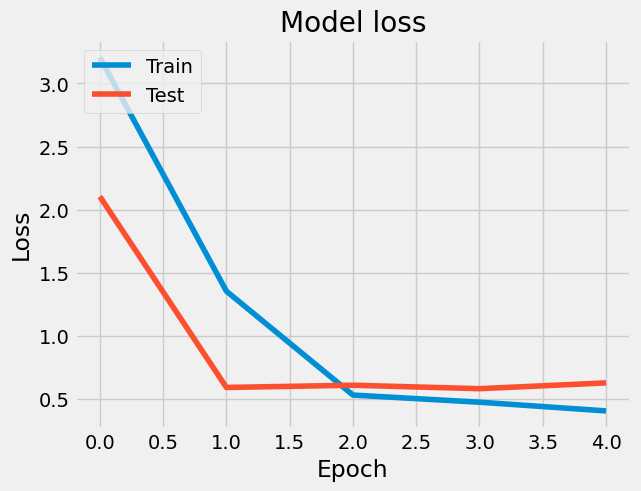

In [30]:
"""可视化下看看训练情况"""
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

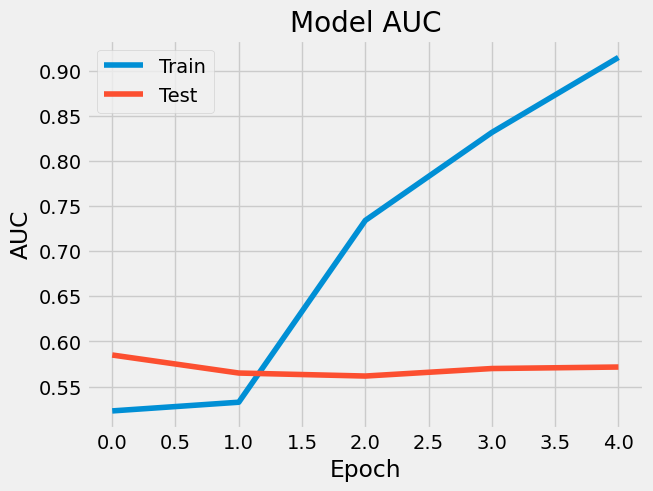

In [31]:

"""模型评估"""
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc']) 
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()